# machine learning

### This script contains the following:
### 1. Importing libraries and data
### 2. Data cleaning
### 3. Data prep for regression analysis
### 4. Regression analysis
### 5. performance improvement after removing outliers

# 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# creating path

path = r'C:\Users\Apex PC\Desktop\DATA ANALYSIS\Achievement 6 project\df_kc.csv'

In [4]:
path

'C:\\Users\\Apex PC\\Desktop\\DATA ANALYSIS\\Achievement 6 project\\df_kc.csv'

In [5]:
df_kc = pd.read_csv(os.path.join(path))

In [6]:
df_kc.head()

Unnamed: 0.1  Unnamed: 0          id        date     price  bedrooms  \
0             0           0  7129300520  2014-10-13  221900.0         3   
1             1           1  6414100192  2014-12-09  538000.0         3   
2             2           2  5631500400  2015-02-25  180000.0         2   
3             3           3  2487200875  2014-12-09  604000.0         4   
4             4           4  1954400510  2015-02-18  510000.0         3   

   bathrooms  sqft_living  sqft_lot  floors  ...  sqft_above  sqft_basement  \
0       1.00         1180      5650     1.0  ...        1180              0   
1       2.25         2570      7242     2.0  ...        2170            400   
2       1.00          770     10000     1.0  ...         770              0   
3       3.00         1960      5000     1.0  ...        1050            910   
4       2.00         1680      8080     1.0  ...        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  price category  
0        5650       Low price  
1        7639    Middle price  
2        8062       Low price  
3        5000      High price  
4        7503    Middle price  

[5 rows x 24 columns]

In [7]:
df_kc.shape

(21613, 24)

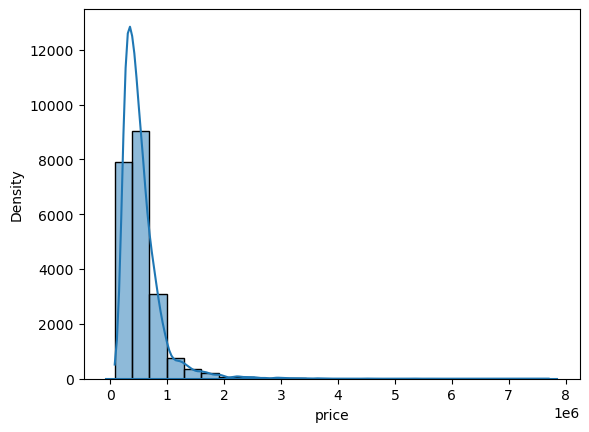

In [9]:
# extreme values check

sns.histplot(df_kc['price'], bins=25, kde=True)
plt.show()

# Some of the outliers in the high values may need to be removed, trying without doing so first.

In [10]:
df_kc['price'].mean() # Check the mean

540182.1587933188

In [11]:
df_kc['price'].median() # Check the median

450000.0

In [12]:
df_kc['price'].max() # Check the max

7700000.0

# data prep for regression analysis

# hypothesis
# Price vs. Condition/Grade
# H0: House condition or grade does not influence the sale price.
# H1: Better condition or grade leads to higher prices.                                                                                                 

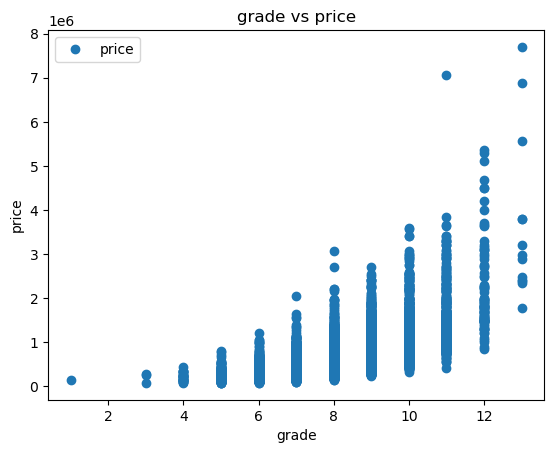

In [15]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_kc.plot(x = 'grade', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('grade vs price')  
plt.xlabel('grade')  
plt.ylabel('price')  
plt.show()

In [16]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_kc['grade'].values.reshape(-1,1)
y = df_kc['price'].values.reshape(-1,1)

In [18]:
X

array([[7],
       [7],
       [6],
       ...,
       [7],
       [8],
       [7]], dtype=int64)

In [20]:
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [21]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# regression analysis

In [22]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [23]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

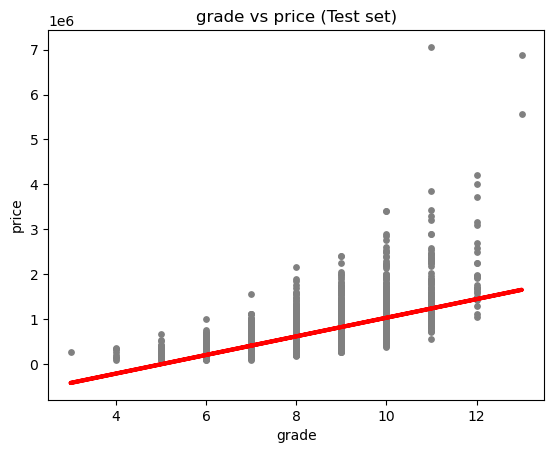

In [25]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('grade vs price (Test set)')
plot_test.xlabel('grade')
plot_test.ylabel('price')
plot_test.show()

# Here the linear model represented by the red regression line doesn’t perfectly cover all of my data points. While the general trend is upward, the data points are widely scattered, especially at higher grades (10–13). The regression line appears to underestimate prices at higher grades and slightly overestimate at lower grades, suggesting that the relationship between grade and price may be non-linear.

In [26]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [27]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[207408.74789997]]
Mean squared error:  76139103515.22272
R2 score:  0.4461042303379047


In [28]:
y_predicted

array([[ 405018.59607601],
       [1442062.33557586],
       [ 405018.59607601],
       ...,
       [ 197609.84817605],
       [ 405018.59607601],
       [ 405018.59607601]])

In [29]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

Actual     Predicted
0    297000.0  4.050186e+05
1   1580000.0  1.442062e+06
2    562100.0  4.050186e+05
3    631500.0  6.124273e+05
4    780000.0  8.198361e+05
5    485000.0  4.050186e+05
6    340000.0  4.050186e+05
7    335606.0  6.124273e+05
8    425000.0  8.198361e+05
9    490000.0  1.027245e+06
10   732000.0  8.198361e+05
11   389700.0  4.050186e+05
12   450000.0  6.124273e+05
13   357000.0  4.050186e+05
14   960000.0  8.198361e+05
15   257000.0  1.976098e+05
16   448000.0  4.050186e+05
17   610000.0  4.050186e+05
18   230950.0  1.976098e+05
19   377500.0  4.050186e+05
20   375000.0  4.050186e+05
21   410000.0  4.050186e+05
22   459000.0  4.050186e+05
23   190000.0  1.976098e+05
24   585000.0  6.124273e+05
25   280000.0  1.976098e+05
26   500000.0  4.050186e+05
27   465000.0  4.050186e+05
28   802000.0  8.198361e+05
29   440000.0  4.050186e+05

# There is a little difference between the actual and predicted y values and doesn's explain the relationship between 'grade' and 'price'.The relationship simply doesn’t follow a single, straight regression line (so a single, straight regression line won’t be able to accurately predict anything!).

# comparing how the regression fits the training set

In [30]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [31]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [32]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[207408.74789997]]
Mean squared error:  74270848424.71481
R2 score:  0.4452064520270643


# the MSE is quite large at 74270848424.71481. The model makes some big mistakes in predicting prices — especially for very expensive homes.
# The model explains about 44% of the changes in price using grade. That means it's finding some pattern, but it's missing more than half the story.

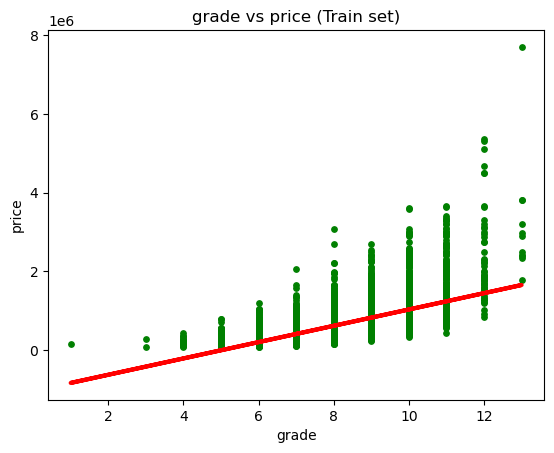

In [33]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('grade vs price (Train set)')
plot_test.xlabel('grade')
plot_test.ylabel('price')
plot_test.show()

# performance improvement after removing outliers

In [35]:
# Cleaning the extreme values from the "price" variable observed during the consistency checks.

df_test = df_kc[df_kc['price'] <=3000000.0] 

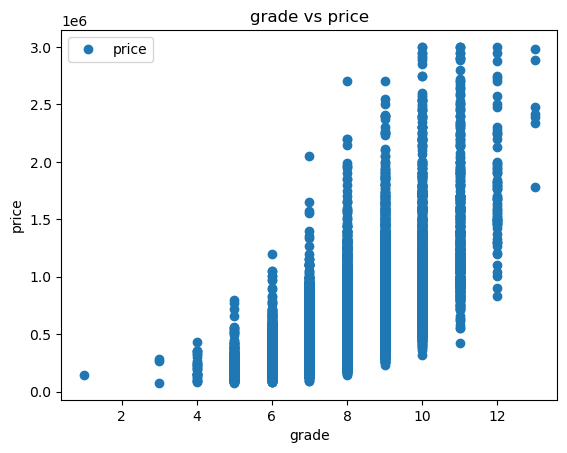

In [36]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'grade', y='price', style='o')  
plt.title('grade vs price')  
plt.xlabel('grade')  
plt.ylabel('price')  
plt.show()

In [37]:
# Reshape again.

X_2 = df_test['grade'].values.reshape(-1,1)
y_2 = df_test['price'].values.reshape(-1,1)

In [38]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [39]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [40]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [41]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [42]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[193875.34613156]]
Mean squared error:  57093876720.05505
R2 score:  0.4574859139156835


# the MSE is quite large at 57093876720.05505. The model makes some big mistakes in predicting prices — especially for very expensive homes.
# The model explains about 46% of the changes in price using grade. That means it's finding some pattern, but it's missing more than half the story.

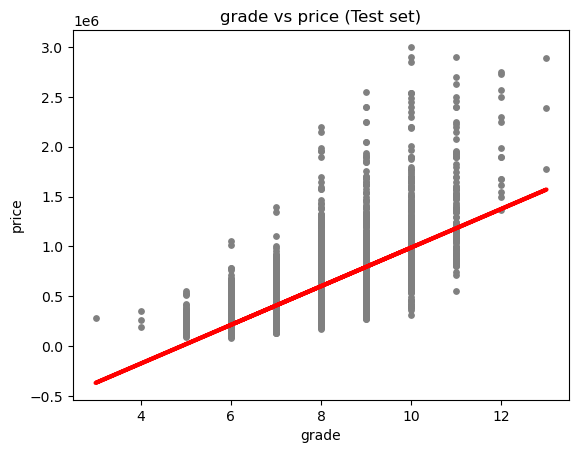

In [43]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('grade vs price (Test set)')
plot_test.xlabel('grade')
plot_test.ylabel('price')
plot_test.show()

In [44]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

Actual     Predicted
0    250000.0  2.135830e+05
1    370000.0  6.013337e+05
2    316000.0  4.074584e+05
3    219000.0  4.074584e+05
4    230000.0  6.013337e+05
5    300000.0  4.074584e+05
6    385000.0  4.074584e+05
7    300000.0  6.013337e+05
8    690000.0  7.952091e+05
9    475000.0  6.013337e+05
10   465000.0  6.013337e+05
11   285000.0  2.135830e+05
12   367950.0  6.013337e+05
13   397500.0  4.074584e+05
14  1200000.0  1.182960e+06
15   409950.0  4.074584e+05
16   585000.0  4.074584e+05
17   650000.0  4.074584e+05
18   810000.0  7.952091e+05
19   615000.0  6.013337e+05
20   215000.0  4.074584e+05
21   430000.0  2.135830e+05
22   430000.0  4.074584e+05
23   565000.0  4.074584e+05
24   760000.0  6.013337e+05
25  1100000.0  9.890844e+05
26   365000.0  2.135830e+05
27   250000.0  4.074584e+05
28   438000.0  2.135830e+05
29  1580000.0  6.013337e+05

### Model Performance and Data Bias (Summary)
The red line in the training set graph shows that the model has learned the general pattern — as the 'grade' of a house goes up, the 'price' also increases. This is similar to what we saw in the test set, so the model is consistent. However, it doesn’t predict all prices accurately. It often underestimates prices for high-grade houses and overestimates them for lower-grade ones. This means a simple straight regression line model might not be enough, especially for very expensive homes.

#### About Data Bias

There might be some bias in the data:
- Grade alone may not fully explain house price — other factors like 'sqft_living' and 'bedrooms' might matter too.
- If there are more houses with certain grades, the model might learn more from those and be less accurate on others.

To improve the model, we could:
- Use more features (like sqft_living, bedroom, etc.).
- Remove or adjust for extreme values.
